x_t' = 

x_b*y_t/y_b - x_t + 1

x_b' = 

-x_b + x_b/x_t + 2*x_t

y_t' = 

2*y_b - y_t + 1

y_b' = 

-y_b + y_b/y_t + x_t*y_t/x_b

tn_inits={x_t: 2, x_b: 1, y_t: 1, y_b: 1}
tn_exprs={x: x_t/x_b, y: y_t/y_b}


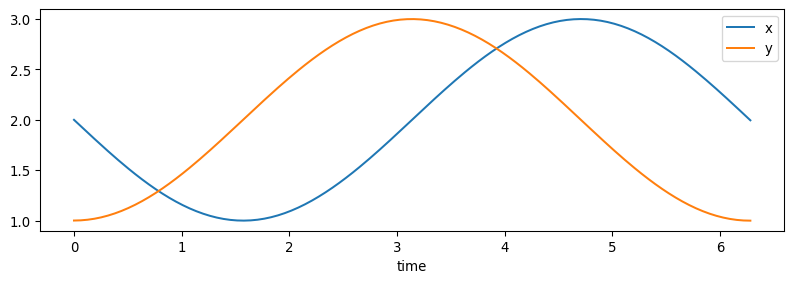

In [8]:
from math import pi
import numpy as np
import sympy
import gpac
from transform import plot_tn, ode2tn

xt,xb,yt,yb = sympy.symbols('x_t x_b y_t y_b')
x,y = sympy.symbols('x y')
odes = {
    x: y-2,
    y: -x+2,
}
inits = {
    x: 2,
    y: 1,
}
gamma = 1
beta = 1
t_eval = np.linspace(0, 2*pi, 200)
tn_odes, tn_inits, tn_exprs = ode2tn(odes, inits, gamma, beta)
from IPython.display import display
for sym, expr in tn_odes.items():
    print(f"{sym}' = ", end='')
    display(expr)
print(f'{tn_inits=}')
print(f'{tn_exprs=}')
gpac.plot(odes, inits, t_eval)
plot_tn(odes, inits, gamma, beta, t_eval=t_eval) #, symbols_to_plot=[xt,xb,yt,yb])